In [1]:
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class BGDLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []

    def fit(self, X_train, y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
            # print("Shape of y_hat", y_hat.shape)
            
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            coef_der = -2 * np.dot((y_train- y_hat), X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr* coef_der)

            # Calculate and store the loss
            loss = np.mean((y_train - y_hat) ** 2)
            self.loss_history.append(loss)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

    def plot_loss(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.loss_history, label='Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss vs Iterations')
        plt.legend()
        plt.grid(True)
        plt.show()

**Results on Dataset 1: _Boston Housing Dataset_**

In [4]:
data = pd.read_csv('BostonHousing.csv')
data = data.iloc[:, 1:]
X = data.iloc[:, :-1]  # All columns except the last one
Y = data.iloc[:, -1]   # Only the last column
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
# Results using sklearn model

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 score: {r2}")

Mean Squared Error: 24.34853358777496
R2 score: 0.6679765786180158


In [6]:
# Do feature scaling of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test) 

In [7]:
# Result using custom model
obj = BGDLinearRegression() 
obj.fit(X_train_transformed, Y_train)
y_pred = obj.predict(X_test_transformed)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 score: {r2}")

Mean Squared Error: 24.712929186709303
R2 score: 0.6630075782033271


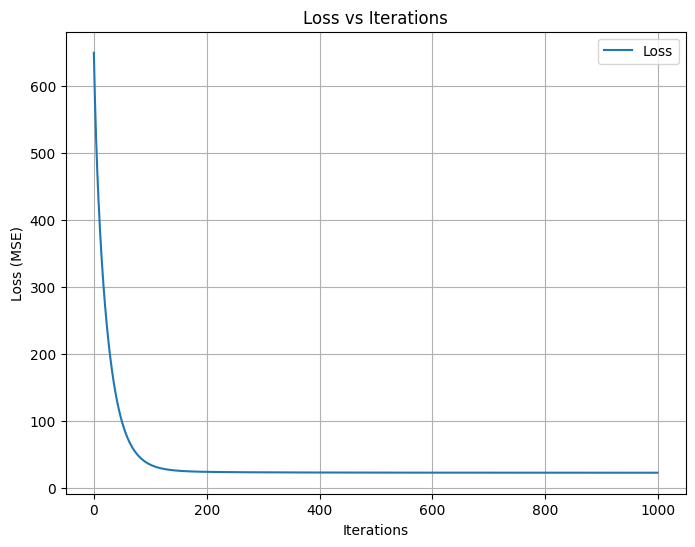

In [8]:
# Graph of loss versus iterations
obj.plot_loss()

**Results on Dataset 2: _Advertising Dataset_**

In [9]:
data = pd.read_csv('advertising.csv')
data = data.iloc[:, 1:]
X = data.iloc[:, :-1]  # All columns except the last one
Y = data.iloc[:, -1]   # Only the last column
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Results using sklearn model

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 27.500631849925412
R2 Score: 0.1100435955378477


In [11]:
# Do feature scaling of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test) 

In [12]:
# Result using custom model
obj1 = BGDLinearRegression() 
obj1.fit(X_train_transformed, Y_train)
y_pred = obj1.predict(X_test_transformed)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 27.500629093832014
R2 Score: 0.11004368472863368


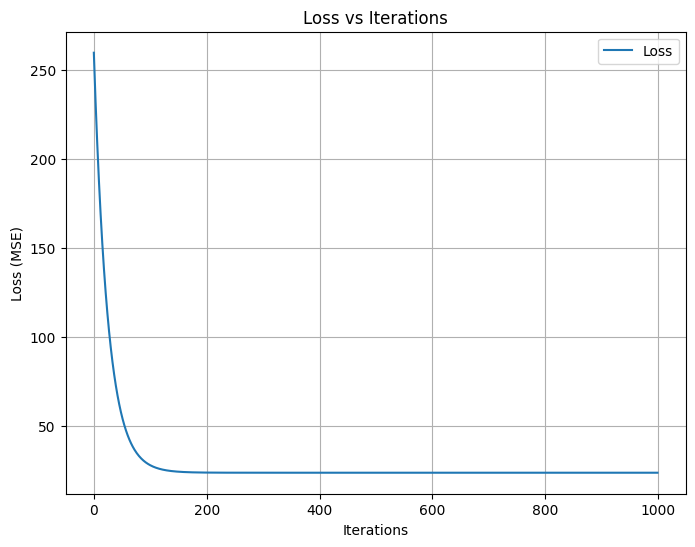

In [13]:
obj1.plot_loss()